In [42]:
import pandas as pd

pdf = pd.read_csv("export (7).csv")
pdf = pdf.sort_values(by='timestamp')
pdf

,timestamp,EventProcessedUtcTime,PartitionId,EventEnqueuedUtcTime,co2_value,temperature,humidity,lag1_seconds,lag2_seconds
0,2025-01-02 17:47:47.165,2025-01-02 17:49:32.562593,0,2025-01-02 17:47:47.248,496,27.0,41.9,0.083,105.397593
1,2025-01-02 17:47:52.214,2025-01-02 17:49:32.562626,0,2025-01-02 17:47:52.295,517,26.9,42.0,0.081,100.348626
2,2025-01-02 17:47:57.265,2025-01-02 17:49:32.562661,0,2025-01-02 17:47:57.342,495,27.0,41.9,0.077,95.297661
3,2025-01-02 17:48:02.315,2025-01-02 17:49:32.562694,0,2025-01-02 17:48:02.404,511,26.9,42.1,0.089,90.247694
4,2025-01-02 17:48:07.369,2025-01-02 17:49:32.562727,0,2025-01-02 17:48:07.451,492,27.0,42.2,0.082,85.193727
...,...,...,...,...,...,...,...,...,...
8378,2025-01-03 14:52:30.425,2025-01-03 14:52:30.712304,0,2025-01-03 14:52:30.552,775,19.8,45.6,0.127,0.287304
8379,2025-01-03 14:52:35.474,2025-01-03 14:52:35.743679,0,2025-01-03 14:52:35.599,782,19.8,45.6,0.125,0.269679
8380,2025-01-03 14:52:40.525,2025-01-03 14:52:40.774921,0,2025-01-03 14:52:40.630,786,19.8,45.5,0.105,0.249921
8381,2025-01-03 14:52:45.575,2025-01-03 14:52:45.915320,0,2025-01-03 14:52:45.676,767,19.8,45.5,0.101,0.340320


In [15]:
# Calculate the optimal relative deadband threshold for co2_value
deadband_threshold = 0.05  # Example threshold value, adjust as needed
pdf['co2_value_diff'] = pdf['co2_value'].diff().abs()
pdf['co2_value_relative_diff'] = pdf['co2_value_diff'] / pdf['co2_value'].shift(1).abs()
pdf_filtered = pdf[pdf['co2_value_relative_diff'] > deadband_threshold]

# Calculate time weighted average with a rolling mean of 10 minutes for pdf and pdf_filtered
pdf['timestamp'] = pd.to_datetime(pdf['timestamp'])
pdf.set_index('timestamp', inplace=True)
pdf = pdf.sort_values('timestamp')
pdf['co2_value_rolling_mean'] = pdf['co2_value'].rolling('10min').mean()
pdf.reset_index(inplace=True)

pdf_filtered['timestamp'] = pd.to_datetime(pdf_filtered['timestamp'])
pdf_filtered.set_index('timestamp', inplace=True)
pdf_filtered = pdf_filtered.sort_values('timestamp')

pdf_resampled = pdf_filtered.resample('min')  # Resample to 1-minute intervals
pdf_interpolated = pdf_resampled.interpolate(method='linear')  # Linear interpolation
# pdf_interpolated['co2_value_rolling_mean'] = pdf_interpolated['co2_value'].rolling('10min').mean()
# pdf_interpolated = pdf_interpolated.reset_index()
pdf_interpolated

C:\Users\SymensB\AppData\Local\Temp\ipykernel_14404\1564040748.py:19: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  pdf_interpolated = pdf_resampled.interpolate(method='linear')  # Linear interpolation


,EventProcessedUtcTime,PartitionId,EventEnqueuedUtcTime,co2_value,temperature,humidity,lag1_seconds,lag2_seconds,co2_value_diff,co2_value_relative_diff,co2_value_rolling_mean
timestamp,,,,,,,,,,,
2025-01-02 17:51:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 17:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 17:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 17:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 17:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-03 14:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03 14:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03 14:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import datetime as dt


# Create subplots with shared x-axis and separate y-axes
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# Add CO2 values trace
fig.add_trace(
    go.Scatter(x=pdf['timestamp'], y=pdf['co2_value'], mode='lines', name='CO2 (ppm)'),
    row=1, col=1
)

# Add Temperature trace
fig.add_trace(
    go.Scatter(x=pdf['timestamp'], y=pdf['temperature'], mode='lines', name='Temperature'),
    row=2, col=1
)

# Add Humidity trace
fig.add_trace(
    go.Scatter(x=pdf['timestamp'], y=pdf['humidity'], mode='lines', name='Humidity'),
    row=3, col=1
)

# Update layout for better visualization
fig.update_layout(
    title_text="Stacked Trends with Shared X-Axis",
    xaxis_title="Timestamp",
    height=1000,
    width=1400
)

# Update y-axis titles for each subplot
fig.update_yaxes(title_text="CO2 (ppm)", row=1, col=1)
fig.update_yaxes(title_text="Temperature (°C)", row=2, col=1)
fig.update_yaxes(title_text="Humidity (%)", row=3, col=1)

# Show the figure
fig.show()


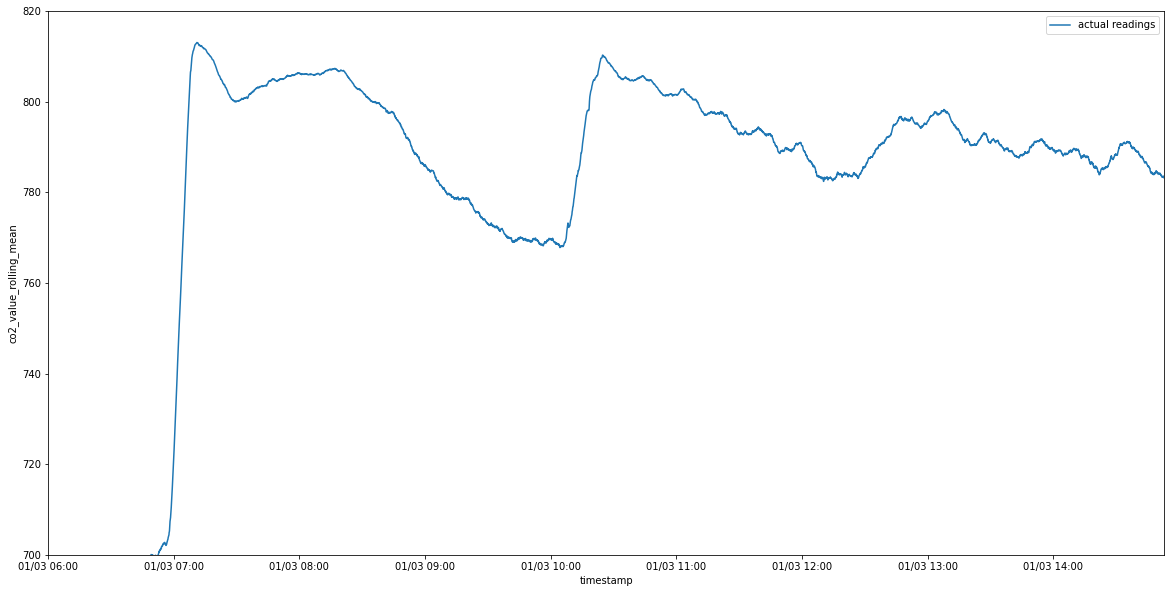

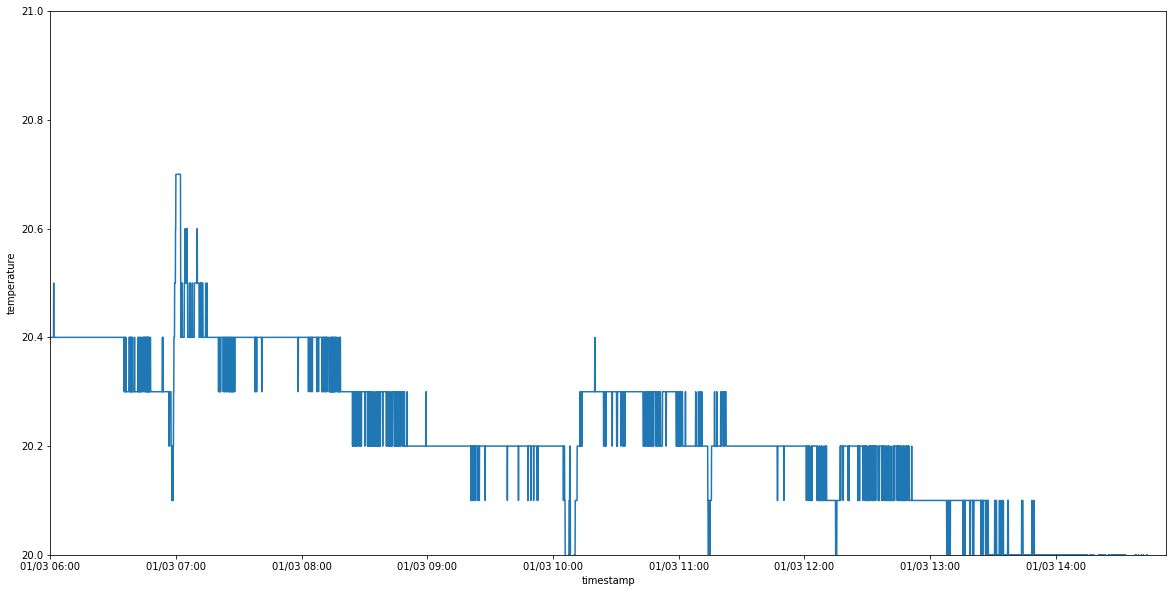

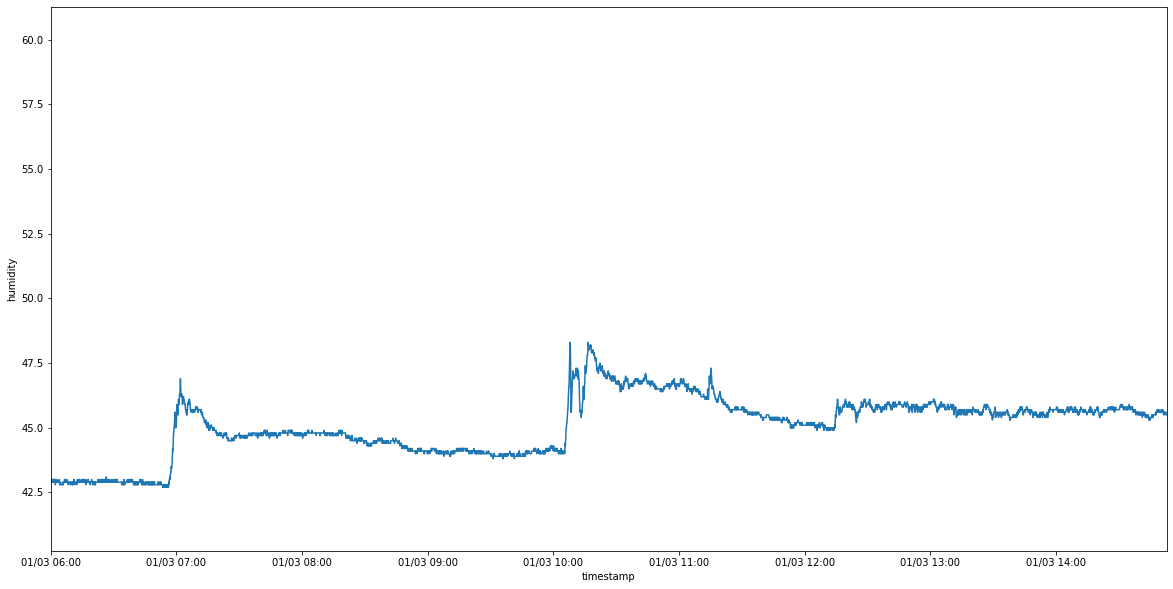

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

plt.figure(figsize=(20, 10))
sns.lineplot(data=pdf, x='timestamp', y='co2_value_rolling_mean',label= 'actual readings')
# sns.lineplot(data=pdf, x='timestamp', y='co2_value_rolling_mean', label= 'compressed data')
plt.xlim([dt.datetime(2025, 1, 3, 6, 0, 0), pdf['timestamp'].max()])
plt.ylim([700, 820])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

plt.figure(figsize=(20, 10))
sns.lineplot(data=pdf, x='timestamp', y='temperature')
plt.xlim([dt.datetime(2025, 1, 3, 6, 0, 0), pdf['timestamp'].max()])
plt.ylim([20, 21])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

plt.figure(figsize=(20, 10))
sns.lineplot(data=pdf, x='timestamp', y='humidity')
plt.xlim([dt.datetime(2025, 1, 3, 6, 0, 0), pdf['timestamp'].max()])
# plt.ylim([20, 21])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))